In [57]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (12,8)

# Problem 1

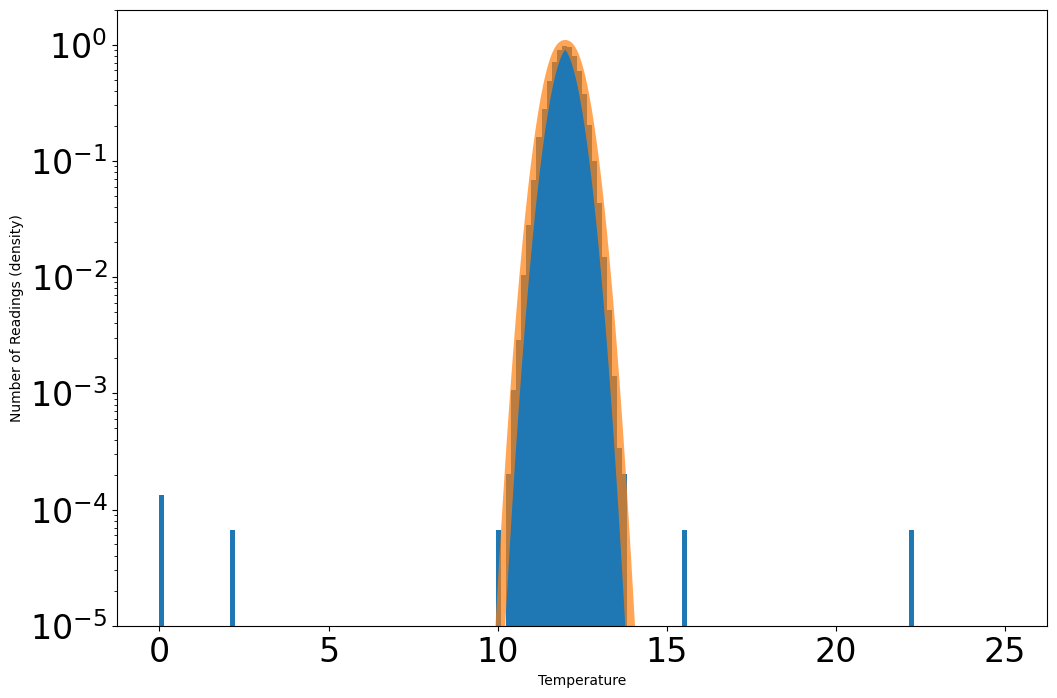

In [33]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d, 150, density=True)
ax.tick_params(labelsize = 24)
ax.set_ylim([10e-6, 2])
ax.set_yscale('log')
ax.set_xlabel("Temperature")
ax.set_ylabel("Number of Readings (density)")
x = np.linspace(0, 25,1000)
ax.plot(x,stats.norm.pdf(x, loc = 12, scale = 0.4),linewidth = 7,alpha = 0.7)
plt.show()

Statistical Question: What number of points lie outside the associated Gaussian distribution (loc = 12, scale = 0.4)?
<br> <br>
Math: Need to make a choice on what "outside" the distribution means- choose anything beyond 5 sigma (statistical significance threshold). The 5 sigma probability is a known value from Z-tables (~1/3.5e6), but you can use the cdf function to find it. Use the ppf then to find what actual values this probability corresponds to.
<br>
$ N(outside) = (\int_{-\infty}^{5\ sigma\ value} (Histogram) \ dx + \int_{5\ sigma\ value}^{\infty} (Histogram) \ dx)$
<br>
Using the frequency histogram, not the density histogram.

In [56]:
prob5 = 1 - stats.norm.cdf(5, scale = 1, loc = 0)
thresh_low = stats.norm.ppf(prob5, loc = 12, scale = 0.4)
thresh_high = stats.norm.ppf(1 - prob5, loc = 12, scale = 0.4)

d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

count_tot = len(d)

count_low = 0
for i in range(len(d)):
    if(d[i] <= thresh_low):
        count_low = count_low + 1
        
count_high = 0
for i in range(len(d)):
    if(d[i] >= thresh_high):
        count_high = count_high + 1
        
number_out = count_low + count_high
print("Number Outside: " + str(number_out) + ". Total Number: " + str(count_tot))

Number Outside: 6. Total Number: 100008


Truth Table:
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; True T | Bad T <br>
-----------------------------<br>
My Test G |100000|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
My Test B |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
-----------------------------<br>
Count &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|100000|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;8&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>

We did not throw out any good data, but this could have happened if we chose a statistical threshold that was low enough where real data occured within it. There were 2 mistakes of commission, which is unavoidable as there is always a chance that mistakes randomly end up within accepted values, but a lower statistical threshold would lower the chance of this happening (while increasing the risk of omission).

# Problem 2

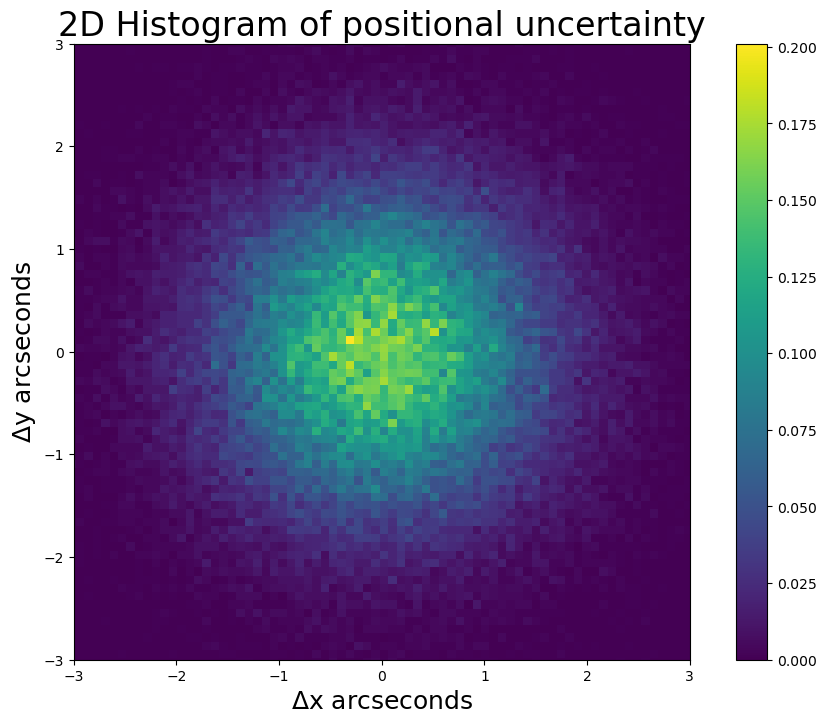

In [64]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

Statistical Question: What is the distance traveled associated with a 5 sigma detection?
<br><br>
Math: Distance is $(x^{2} +y^{2})^{1/2}$, so the distribution should follow the same. The square root of the squares of two Gaussians gives a Rayleigh, so we just need to find the 5 sigma value of a Rayleigh distribution (the scale of the sigma goes as the square root of the scale of the Gaussians, but this is still just 1).
<br>
Prob ~ 1/3.5e6 as before.
<br>
Value = 

The distance (in arcseconds) which represents a 5 sigma detection is 5.489079776034238


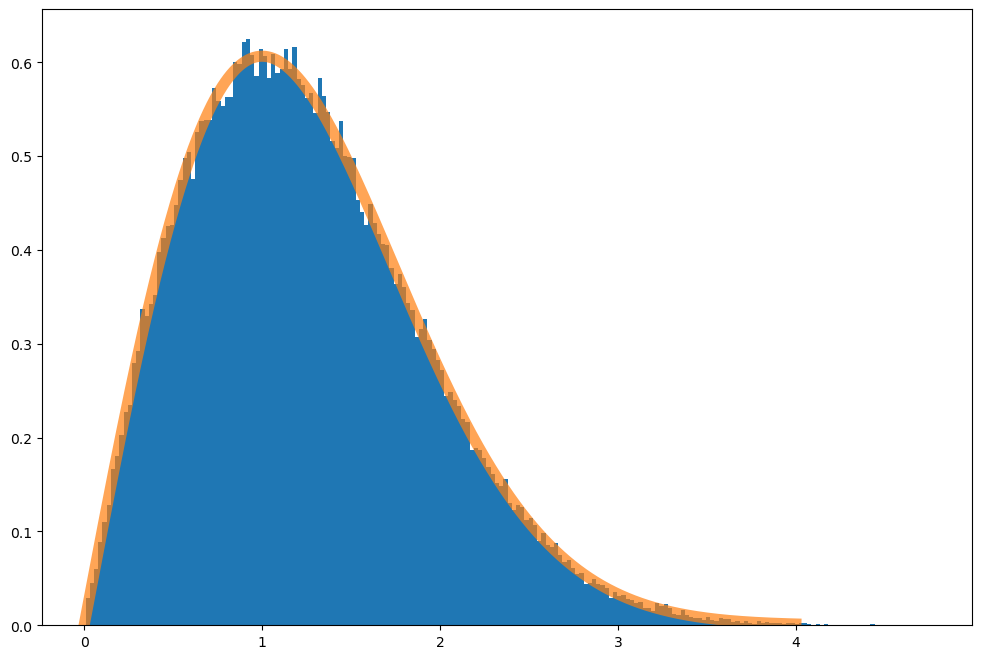

In [74]:
dx = a[0]
dy = a[1]
dist_act = np.sqrt(dx**2 + dy**2)

fig, ax = plt.subplots(1, 1)
ax.hist(dist_act, 200, density = True)

ax.plot(np.linspace(0,4,1000), stats.rayleigh.pdf(np.linspace(0,4,1000), loc = 0, scale = 1), linewidth = 8, alpha = 0.7)

prob5sigma = stats.norm.cdf(5, loc = 0, scale = 1)
dist = stats.rayleigh.ppf(prob5sigma, loc = 0, scale = 1)
print("The distance (in arcseconds) which represents a 5 sigma detection is " + str(dist))

# Problem 3

Statistical Question: What is the significance associated with seeing 6,800 cosmic rays over 15 days in the shadow of the moon?
<br><br>
Math: Cosmic ray radiation from space generally follows a Poisson background distribution.

-4.750747965777188

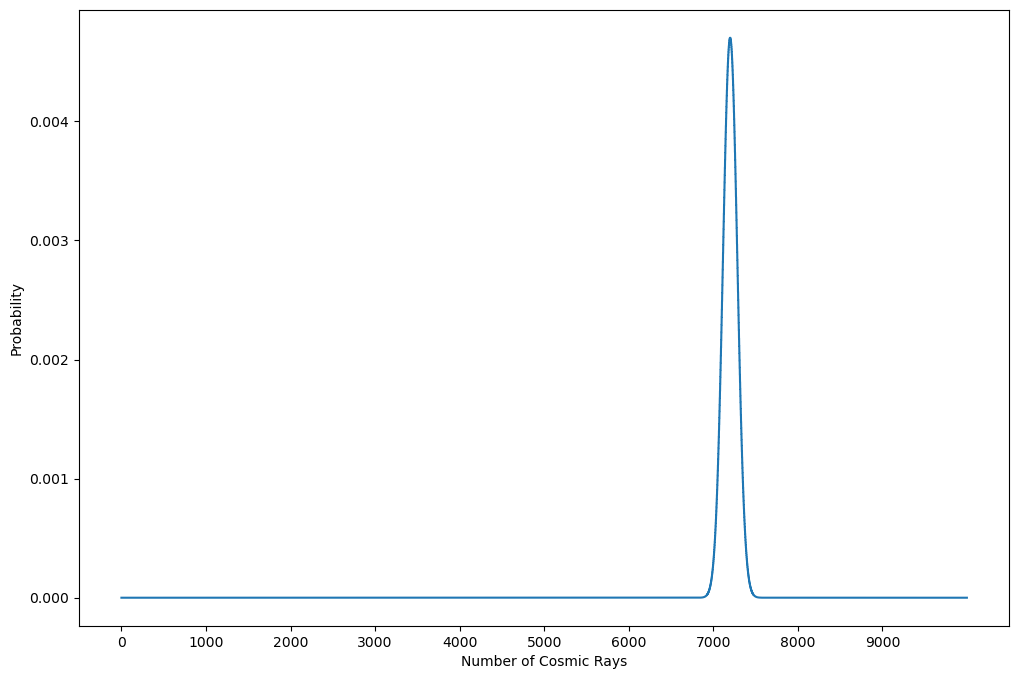

In [115]:
k = np.arange(0,10000,1)
mu = 480*15
background = stats.poisson.pmf(k, mu, loc = 0)

fig, ax = plt.subplots(1, 1)
ax.set_xlabel("Number of Cosmic Rays")
ax.set_ylabel("Probability")
ax.set_xticks(np.arange(0,10000,1000))

ax.step(k, background)

seen = 6800

prob = stats.poisson.cdf(seen, mu, loc = 0)
sigma = stats.norm.ppf(prob, loc = 0, scale = 1)
sigma